In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.43 PM.jpeg
/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.58 PM (1).jpeg
/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.57 PM (2).jpeg
/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.58 PM.jpeg
/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.59 PM.jpeg
/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.56 PM.jpeg
/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.57 PM (1).jpeg
/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.57 PM.jpeg
/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.49 PM.jpeg
/kaggle/input/facesdata/dataset/rahul_kalsh/WhatsApp Image 2025-03-26 at 9.34.37 PM.jpeg
/kaggle/input/facesdata/dataset/akash_kumar/WhatsApp Image 2025-03-26 at 9.35.48 PM (1).jpeg
/kagg

In [8]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [9]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [10]:
!pip install mtcnn

In [13]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

**Use MTCNN for Face Detection**

In [16]:
from mtcnn.mtcnn import MTCNN

In [22]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [23]:
faceloading = FACELOADING("/kaggle/input/facesdata/dataset")
X, Y = faceloading.load_classes()

Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10


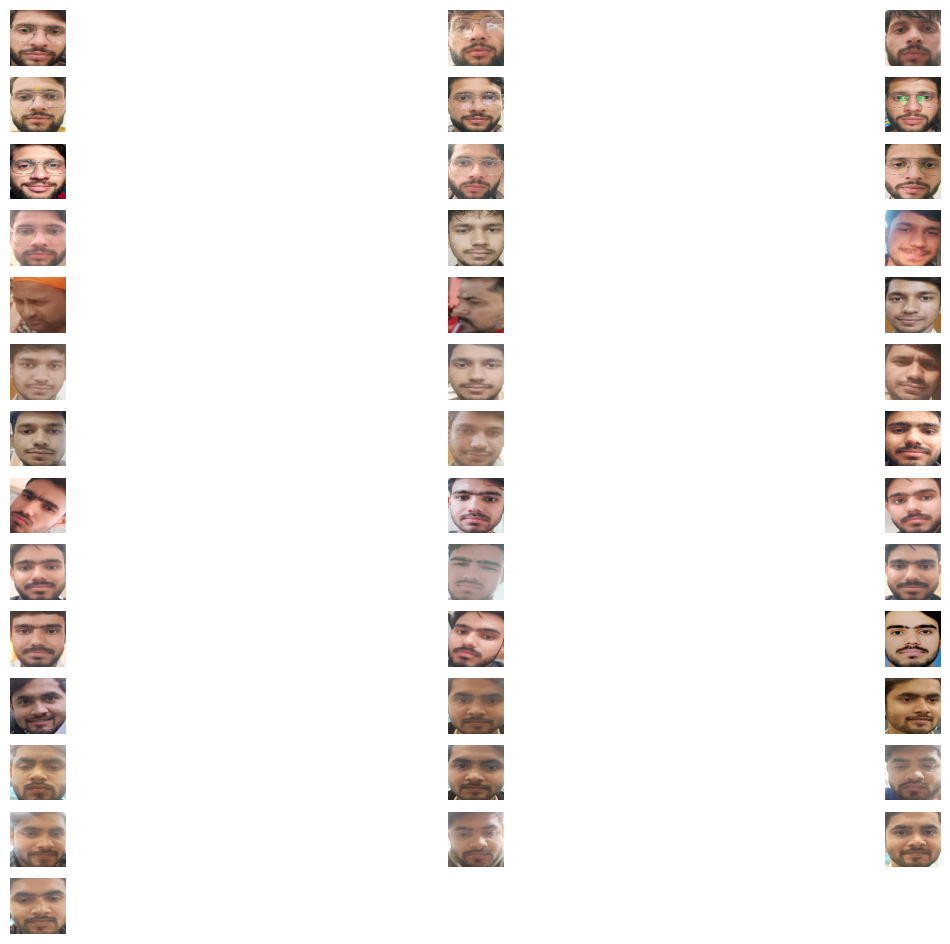

In [24]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [25]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=3137091a154772b9900ad0dcc93c7d51c659d833bf994603b8885ec53c0d63c3
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [26]:
from keras_facenet import FaceNet

**Make Embedding**

In [27]:
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [28]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━

In [29]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [32]:
Y 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

**Using SVM model for Classification**

In [34]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [35]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

**Training Accuracy**

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

**Testing Accuracy**

In [37]:
accuracy_score(Y_test,ypreds_test)

1.0

**Testing On 4 images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


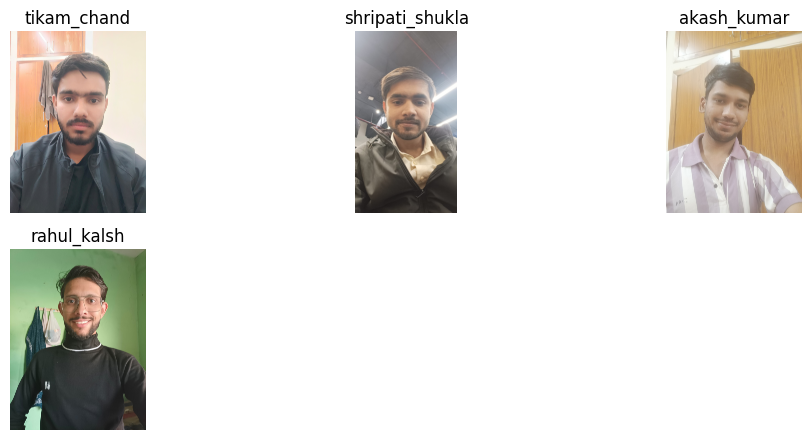

In [58]:
folder_path = "/kaggle/input/facetestdata"
images, names = [], []

for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        faces = detector.detect_faces(img)
        if len(faces) == 0:
            continue  # Skip if no face detected

        x, y, w, h = faces[0]['box']
        face = img[y:y+h, x:x+w]
        face = cv.resize(face, (160, 160))

        embedding = get_embedding(face)  # Extract embedding
        prediction = model.predict([embedding])
        name = encoder.inverse_transform(prediction)[0]

        images.append(img)
        names.append(name)

plt.figure(figsize=(12, 8))
for i, (img, name) in enumerate(zip(images, names)):
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(name)

plt.show()

In [59]:
import pickle
#save the model
with open('svm_model_final.pkl','wb') as f:
    pickle.dump(model,f)